## Question 1: Categorial and Numeric variables

#### Importing Packages

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt

#### Reading in CSV file

In [2]:
df = pd.read_csv('ECA_data.csv')

Categorical variables are columns that have a limited number of possibilities of values. A numeric variable covers a range of values.

From the definitions provided in the ECA document, the following are categorical variables:

* Rating can only take 2 values (0 and 1), which corresponds to 'Good' and 'Bad' respectively. Hence, it's a categorical variable.
* Gender can only take 2 values (0 and 2), which corresponds to 'Male' and 'Female' respectively. Hence, it's a categorical variable.
* Education can only take 4 values (0, 1, 2, 3), which corresponds to 'Others', 'Postgraduate', 'Tertiary' and 'High School' respectively. Hence, it's a * categorical variable.
* Marital can only take 3 values (0, 1 and 2), which corresponds to 'Others', 'Single' and 'Married' respectively. Hence, it's a categorical variable.
* Age can only take a finite ordered numeric values as categorical variables.
* S(n) is a mixed of fixed values (-1 and 0) corresponding to 'Prompt Payment' and 'Minimum Sum Payment', and finite ordered numeric variable. Hence, it's a categorical variable

The following are numeric variables:
<br>Limit, Balance, Income, R(n), B(n)

## Question 2: Pre-processing Tasks

#### Task 1: Filling missing values and Fixing Invalid Values

In [3]:
# Checking the distribution of values for each variable
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,18769.0,9382.049710,5418.203513,1.0,4690.000,9382.000,14074.00,18766.00
LIMIT,18769.0,168275.543716,129405.294386,10000.0,50000.000,140000.000,240000.00,800000.00
BALANCE,18769.0,9119.887343,13045.368642,0.0,640.325,3959.025,11975.25,130692.45
INCOME,18769.0,177765.809100,143092.431648,10000.0,56494.000,148225.000,256826.00,908846.00
RATING,18769.0,0.219244,0.413746,0.0,0.000,0.000,0.00,1.00
GENDER,18769.0,0.618307,0.485815,0.0,0.000,1.000,1.00,1.00
EDUCATION,18756.0,1.789934,0.732326,0.0,1.000,2.000,2.00,3.00
MARITAL,18731.0,1.514922,0.519588,0.0,1.000,2.000,2.00,2.00
AGE,18769.0,35.578614,9.556397,-1.0,28.000,34.000,41.00,199.00
S1,18769.0,0.128776,0.954745,-1.0,0.000,0.000,0.00,7.00


As shown above, AGE variable seems to be suspicious as it has -1 and 199. Age must be nonnegative and no human has lived to the age of 199 yet. Hence, these valids are most likely invalid entries and should be dropped.

In [4]:
df = df[df.AGE.isin([-1, 199]) == False]

In [5]:
# Checking if there are any missing values
df.isna().sum()

ID            0
LIMIT         0
BALANCE       0
INCOME        0
RATING        0
GENDER        0
EDUCATION    13
MARITAL      38
AGE           0
S1            0
S2            0
S3            0
S4            0
S5            0
B1            0
B2            0
B3            0
B4            0
B5            0
R1            0
R2            0
R3            0
R4            0
R5            0
dtype: int64

As seen above, Education and Marital variables have missing values.

In [6]:
# Getting all columns with missing values for further pre-processing
df.columns[df.isnull().any()].tolist()  # to get a list instead of an Index object

['EDUCATION', 'MARITAL']

As we can see, EDUCATION and MARITAL are columns that have missing values. 

Below is the defintiion for Education:
<br> 
> Customer highest education attained
<br> 0: Others, 1: Postgraduate, 2: Tertiary, 3: High School

Hence, it makes sense to convert the missing values for EDUCATION to 0 as we are unsure what Education level they are.

Below is the defintiion for Marital:
<br> 
> Customer marital status 
<br> 0: Others, 1: Single, 2: Married

Hence, it makes sense to convert the missing values for MARITAL to 0 as we are unsure what Education level they are.

In [7]:
df['MARITAL'] = df['MARITAL'].fillna(0)
df['EDUCATION'] = df['EDUCATION'].fillna(0)


While converting all numeric variables to integer types, R3 has some invalid entries with '$' dollar sign. Hence, I will be converting these to numeric values.

In [8]:
df['R3'] = df['R3'].replace("[$,]", "", regex=True).astype(int)

#### Task 2: Reducing Number of Categorical Variables by Discretisation

In [9]:
df['AGE'] = pd.cut(np.array(df['AGE']), bins = (0, 30, 60, 100), right = False, labels = ['Age < 30', 'Age 30-59', 'Age 60+'])
df['S1'] = pd.cut(np.array(df['S1']), bins = (-1, 0, 1, 999), right = False, labels = ['Prompt Payment', 'Minimum Payment', 'Late Payment'])
df['S2'] = pd.cut(np.array(df['S2']), bins = (-1, 0, 1, 999), right = False, labels = ['Prompt Payment', 'Minimum Payment', 'Late Payment'])
df['S3'] = pd.cut(np.array(df['S3']), bins = (-1, 0, 1, 999), right = False, labels = ['Prompt Payment', 'Minimum Payment', 'Late Payment'])
df['S4'] = pd.cut(np.array(df['S4']), bins = (-1, 0, 1, 999), right = False, labels = ['Prompt Payment', 'Minimum Payment', 'Late Payment'])
df['S5'] = pd.cut(np.array(df['S5']), bins = (-1, 0, 1, 999), right = False, labels = ['Prompt Payment', 'Minimum Payment', 'Late Payment'])

As explained in Q1, the above are ordered numeric values as categorical variables. I will convert the values as bins to reduce number of categories upon creating dummy variables in later stages.

#### Task 3: Selecting and Renaming Column Names (Variables)

In [10]:
# Converting values to proper names for easier visualisation and analytics.

education_replacement = {0:'Others', 1:'Postgraudate', 2:'Tertiary', 3:'High School'}
marital_replacement = {0:'Others', 1:'Single', 2:'Married'}

df["EDUCATION_new"] = df["EDUCATION"].replace(education_replacement)
df["MARITAL_new"] = df["MARITAL"].replace(marital_replacement)

I have converted thr values for Education and Marital to its proper meaning as per the definition provided. 

In [11]:
# Selecting only variables I need for prediction
X_var = ['LIMIT', 'BALANCE', 'INCOME', 'RATING',
          'AGE', 'GENDER', 'EDUCATION_new', 'MARITAL_new',
          'S1', 'S2', 'S3', 'S4', 'S5', 
          'B2', 'B3', 'B4', 'B5', 
          'R1', 'R2', 'R3', 'R4', 'R5']
y_var = ['B1']
df_model = df[y_var + X_var]

In [12]:
# Renaming column names for easier visualisation
rename_dict = {'EDUCATION_new':'EDUCATION', 
               'MARITAL_new':'MARITAL'}
df_model = df_model.rename(columns = rename_dict)

#### Task 4: Creating Dummy Variables

In [13]:
categorical_variables = ['AGE', 'EDUCATION', 'MARITAL', 'S1', 'S2', 'S3', 'S4', 'S5']
#pd.get_dummies(df_model[categorical_variables]).columns.tolist()
df_model = df_model.join(
    pd.get_dummies(
        df_model[categorical_variables]
    )
).drop(columns = categorical_variables)

Creating dummy variables for the categorical variables. It is noteworthy that I did not convert GENDER and RATING. This is because there is no loss or additional information gain upon converting them to 2 dummy variables. Hence, I left it as it is.

## Question 3: Insights and Visualisations

In [14]:
# Copying the current DataFrame for further Exploratory Data Analysis
df_visualisation = df.copy()

In [15]:
rating_replacement = {0:'Good', 1:'Bad'}
gender_replacement = {0:'Male', 1:'Female'}
education_replacement = {0:'Others', 1:'Postgraudate', 2:'Tertiary', 3:'High School'}
marital_replacement = {0:'Others', 1:'Single', 2:'Married'}

df_visualisation["EDUCATION"] = df_visualisation["EDUCATION"].replace(education_replacement)
df_visualisation["MARITAL"] = df_visualisation["MARITAL"].replace(marital_replacement)
df_visualisation["RATING"] = df_visualisation["RATING"].replace(rating_replacement)
df_visualisation["GENDER"] = df_visualisation["GENDER"].replace(gender_replacement)

I have converted the numeric value to its proper definition to aid analysis and visualisation albit no extra gain or loss of information.

#### Insight (1): Age Group Distribution

(array([12629.,     0.,     0.,     0.,     0.,  5931.,     0.,     0.,
            0.,   199.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

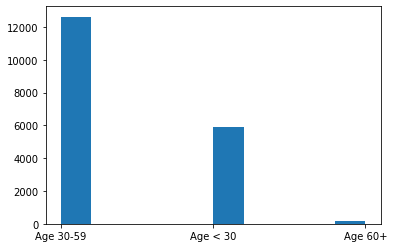

In [17]:
plt.hist(x = np.array(df_visualisation['AGE']))

As shown above, there are:
* Age < 30: 5931
* Age 30-59: 12629
* Age 60+: 199

There is an imbalance in the Age class as there are way more middle-aged adults (30-59) compared to young adults (<30) and elderly (60+)


#### Insight (2): Rating Distribution

(array([ 4115.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 14644.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

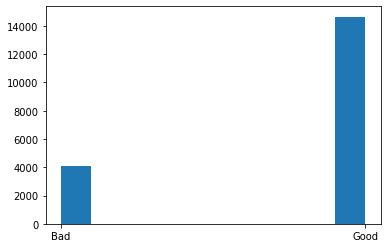

In [18]:
plt.hist(x = np.array(df_visualisation['RATING']))

As shown above, there are:
* Good: 14644
* Bad: 4115

There is an imbalance in the Rating class as there are way more 'Good' than 'Bad'.

Let's see the distribution of Rating amongst the Age groups.

#### Insight (3): Age Group against Rating Distribution

<AxesSubplot:xlabel='AGE,RATING'>

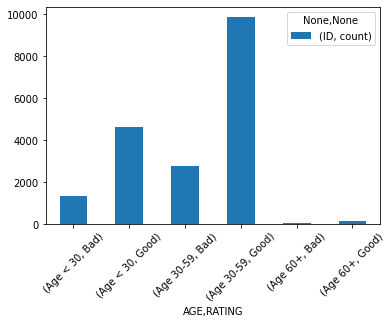

In [19]:
df_visualisation[['AGE', 'RATING', 'ID']].groupby(['AGE', 'RATING']).agg(['count']).plot.bar(rot = 45)

To make it clearer, let's see the proposition by groups.

In [20]:
df_age_rating = df_visualisation[['AGE', 'RATING', 'ID']].groupby(['AGE', 'RATING']).agg(['count'])
df_pcts = df_age_rating.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
df_pcts

ID
                      count
AGE       RATING           
Age < 30  Bad     22.154780
          Good    77.845220
Age 30-59 Bad     21.775279
          Good    78.224721
Age 60+   Bad     25.628141
          Good    74.371859

Interestingly, the distribution of Rating is almost identical across all 3 Age groups. This shows that Rating is not really affected by the Gender class. 

#### Insight (4): Age against B1 Distribution

<AxesSubplot:xlabel='AGE'>

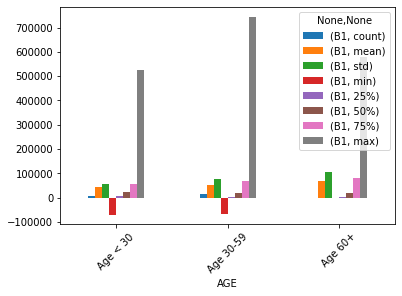

In [21]:
df_visualisation[['AGE', 'B1']].groupby('AGE').describe().plot.bar(rot = 45)

In [22]:
df_visualisation[['AGE', 'B1']].groupby('AGE').describe()

B1                                                         \
             count          mean            std      min     25%      50%   
AGE                                                                         
Age < 30    5931.0  43150.034733   57167.000882 -69777.0  5079.5  22781.0   
Age 30-59  12629.0  52921.201204   77039.948556 -67526.0  2500.0  20669.0   
Age 60+      199.0  68248.793970  107039.640300   -200.0  1576.0  19647.0   

                              
               75%       max  
AGE                           
Age < 30   56359.0  524555.0  
Age 30-59  70193.0  743970.0  
Age 60+    80590.5  577681.0

Surprisingly, the distribution of 'B1' (Billable for most recent month) is similar. It is noteworthy that for the Age < 30 group, the 50-75 percentile and 75-100 percentile are slightly lower than the other 2 groups. This could point to the possibility that the lowest Age group has lowest potential to spend highly. Likewise, the Age 30-59 has the highest 75-100 percentile value as this group is most likely at the peak of their career and has the highest income power to spend.

#### Insight (5): Credit, Limit against Age, Education Distribution

<AxesSubplot:xlabel='AGE,EDUCATION'>

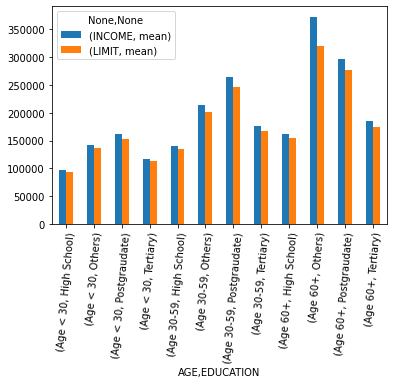

In [23]:
df_visualisation[['EDUCATION', 'AGE', 'INCOME', 'LIMIT']].groupby(['AGE', 'EDUCATION']).agg(['mean']).plot.bar(rot = 85)

From the 3 Age groups, we can see that Limit and Income correlates with the level of Education. As one progresses with higher Education, the Income level, and correspondingly Limit, increases.

There is an outlier in the Age 60+ group where those with 'Others' Education seems to outperform other Educational level. 

Likewise, generally for all Age groups, Income and Credit correlates with Age group. 

#### Insight (6): Credit, Limit against Age, Gender Distribution

<AxesSubplot:xlabel='AGE,GENDER'>

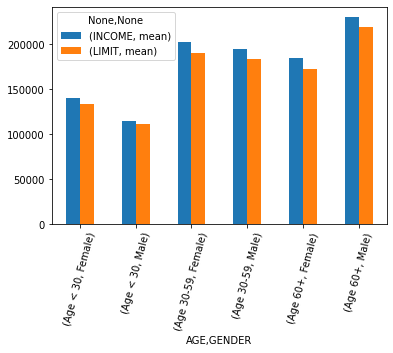

In [24]:
df_visualisation[['GENDER', 'AGE', 'INCOME', 'LIMIT']].groupby(['AGE', 'GENDER']).agg(['mean']).plot.bar(rot = 75)

There is no strong accosiation between Gender and Income/Limit. This shows that there is no detectable gender discrimination over here.

## Question 4: Linear Regression Prediction & Approach

#### Task 1: Data Transformation (Standardization)

In [25]:
# Scale for numeric x var
col_names_x_to_be_scaled =  ['LIMIT', 'BALANCE', 'INCOME', 'RATING', 'GENDER', 'B2', 'B3', 'B4', 'B5', 'R1', 'R2', 'R3', 'R4', 'R5', 'AGE_Age < 30', 'AGE_Age 30-59', 'AGE_Age 60+', 'EDUCATION_High School', 'EDUCATION_Others', 'EDUCATION_Postgraudate', 'EDUCATION_Tertiary', 'MARITAL_Married', 'MARITAL_Others', 'MARITAL_Single', 'S1_Prompt Payment', 'S1_Minimum Payment', 'S1_Late Payment', 'S2_Prompt Payment', 'S2_Minimum Payment', 'S2_Late Payment', 'S3_Prompt Payment', 'S3_Minimum Payment', 'S3_Late Payment', 'S4_Prompt Payment', 'S4_Minimum Payment', 'S4_Late Payment', 'S5_Prompt Payment', 'S5_Minimum Payment', 'S5_Late Payment']
features_x = df_model[col_names_x_to_be_scaled]
scaler_x = StandardScaler().fit(features_x.values)
features_x = scaler_x.transform(features_x.values)
df_model[col_names_x_to_be_scaled] = features_x

Standardisation is applied here across the numeric variables to centralise the values around mean 0. This transform the distribution into a Gaussian distribution, which in this case is necessary as linear regression will assume a Gaussian distribution for its underlying data.

#### Task 2: Split Dataset into Training and Testing

In [26]:
X_train, X_test, y_train, y_test = train_test_split(df_model.drop(columns = y_var), df_model[y_var], test_size = 0.3, random_state = 2022)

Data is split into 70% training data and 30% testing data. We use 30% as we need enough data in testing data to make sure that the model does not overfit.

Overfitting is when too much training data is used and cannot generalise well to the entire dataset.

#### Performing linear Regression using sklearn's LinearRegression

In [27]:
# We fit the training data to the linear regression model.
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
lin_reg.score(X_test, y_test)

0.9476594813202328

The $R^2$ Coefficient is 0.9365. This means 93.65% of the variance is explained by the model.

In [29]:
evaluation = lin_reg.predict(X_test)

In [30]:
# Getting the Root Mean Squared Error (RSME) of the model
#y_true = scaler_y.inverse_transform(y_test)
#y_pred = scaler_y.inverse_transform(evaluation)
#mean_squared_error(y_true, y_pred, squared = False)
mean_squared_error(y_test, evaluation, squared = False)

15936.967960570326

The Root Mean Squared Error (RSME) of the linear regression model is 15936.

## Question 5: Linear Regression Equation and Insights

In [31]:
np.set_printoptions(suppress=True)

In [32]:
print(f"intercept: {lin_reg.intercept_[0]}")

intercept: 50054.96902234574


In [33]:
for names, coef in zip(X_train.columns, lin_reg.coef_[0]):
    print(f'{names}: {coef}')

LIMIT: 2045.8338029235952
BALANCE: 33254.74172338496
INCOME: -2026.4737680242558
RATING: 83.84379435566807
GENDER: -30.55604264024284
B2: 38960.31599121327
B3: -221.0351310632384
B4: -1523.0095711813542
B5: 2276.858083910002
R1: -6558.742710102394
R2: 2997.8886141017347
R3: 552.9936623502052
R4: -780.4748507615434
R5: -149.55752275097123
AGE_Age < 30: -1926516851129256.0
AGE_Age 30-59: -1943318984456888.8
AGE_Age 60+: -424467944880691.2
EDUCATION_High School: -2.1644963592939204e+16
EDUCATION_Others: -7815315304667032.0
EDUCATION_Postgraudate: -2.750495707104674e+16
EDUCATION_Tertiary: -2.8957879515903308e+16
MARITAL_Married: 2197074595041607.8
MARITAL_Others: 480992693968534.56
MARITAL_Single: 2193873233071828.8
S1_Prompt Payment: 1686188979305452.0
S1_Minimum Payment: 2029135940508620.0
S1_Late Payment: 1523691821868903.5
S2_Prompt Payment: 8487046603536.66
S2_Minimum Payment: 10190060740704.42
S2_Late Payment: 7522534327761.767
S3_Prompt Payment: -1671901210662192.5
S3_Minimum Payme

From the coefficient, some of the biggest contributers to the linear regression model are: 
* Age
* Education
* Marital
* S(n)

This can be inferred from the large differences between each of the dummy variables. If the difference is large, it shows that there is a larger influence on the outcome (B1).